# SI 618 - Homework #3: Data Visualization

Version 2024.01.31.3.CT

For this homework assignment, you will use the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

Be sure to download your own copy of the dataset -- do not rely on data that you may have downloaded for a previous assignment.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions.  You may need to do some preprocessing of the data to get it into a form that you can use for visualization.


Each of the questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

**NOTE**: You are only permitted to use the pandas, Seaborn, and matplotlib libraries for creating visualizations in this assignment. You may use other libraries for other purposes, but you may not use them to create visualizations.

<hr>

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [223]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

And let's read the data (note: you might need to include path information when you read the data in, depending on where you place the data file):

In [224]:
movies = pd.read_csv('~/Documents/Umich/SI 618/618_HW/ml-latest-small//movies.csv')
ratings = pd.read_csv('~/Documents/Umich/SI 618/618_HW/ml-latest-small//ratings.csv')
tags = pd.read_csv('~/Documents/Umich/SI 618/618_HW/ml-latest-small//tags.csv')

In [225]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [226]:
movies.shape

(9742, 3)

In [227]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [228]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [229]:
ratings.shape

(100836, 4)

In [230]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [231]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [232]:
tags.shape

(3683, 4)

In [233]:
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year. Be sure to include a title and axis labels.

In [234]:
# find the release year of each movie
movies['year'] = movies.title.str.extract(r'\((\d{4})\)')
# find the index of na year
drop_year = movies[movies.year.isna() == True]
# drop the rows with na year
movies.drop(drop_year.index, inplace = True)

movies.year = movies.year.astype(int)

In [235]:
movies.describe()

,movieId,year
count,9729.00000,9729.000000
mean,42054.09004,1994.613629
std,52026.56424,18.535219
min,1.00000,1902.000000
25%,3244.00000,1988.000000
50%,7282.00000,1999.000000
75%,76030.00000,2008.000000
max,193609.00000,2018.000000


I use two way to draw the plot, first way direct use movie year, second way create decade then plot.

Text(0.5, 1.0, 'Movie Decade Distribution')

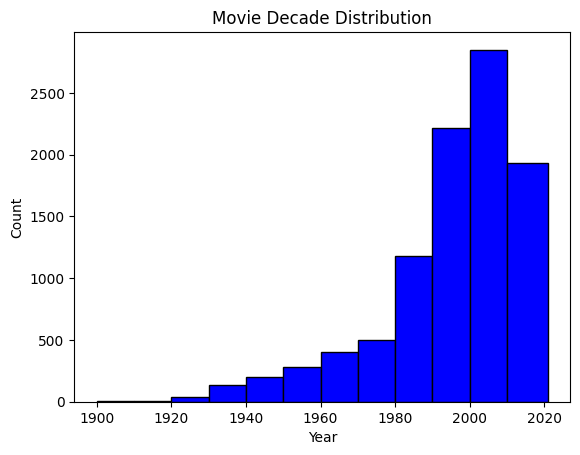

In [236]:
# plot the distribution of movie years
year = plt.figure()
plt.subplot(1,1,1)
plt.xlabel('Year')
plt.ylabel('Count')
plt.hist(movies.year, 
         bins = [1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2021], 
         color = 'blue', edgecolor = 'black')
plt.title('Movie Decade Distribution')


In [237]:
# plot the distribution of movie years by decade
movies['decade'] = pd.cut(movies.year, 
                          bins = [1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2021],
                          right=False,
                            labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
 

/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_23375/1612796943.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movies.groupby('decade').size().plot(kind = 'bar', color = 'blue', edgecolor = 'black')


Text(0.5, 1.0, 'Movie Decade Distribution')

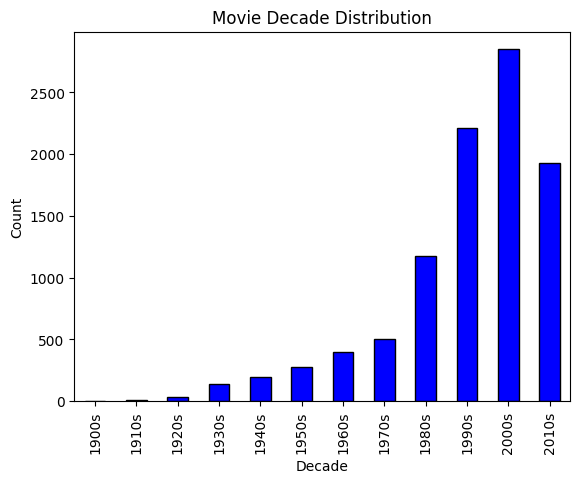

In [238]:
movies.groupby('decade').size().plot(kind = 'bar', color = 'blue', edgecolor = 'black')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Movie Decade Distribution')


### Q2: 
Create a visualization that shows the number of movies in each genre.

**Hint**: the `pd.DataFrame.explode()` function might be useful here.

Be sure that your axis labels are legible!

In [239]:
movies.head()

,movieId,title,genres,year,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990s
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1990s
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990s
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,1990s
4,5,Father of the Bride Part II (1995),Comedy,1995,1990s


In [240]:
# split the genres by '|'
movies['genres'] = movies['genres'].str.split(pat ='|')
movies.head()

,movieId,title,genres,year,decade
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,1990s
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,1990s
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,1990s
4,5,Father of the Bride Part II (1995),[Comedy],1995,1990s


In [241]:
# explode the genres and reset the index
movie_gd = movies.explode('genres')
movie_gd.reset_index(drop = True, inplace = True)
movie_gd.head()

,movieId,title,genres,year,decade
0,1,Toy Story (1995),Adventure,1995,1990s
1,1,Toy Story (1995),Animation,1995,1990s
2,1,Toy Story (1995),Children,1995,1990s
3,1,Toy Story (1995),Comedy,1995,1990s
4,1,Toy Story (1995),Fantasy,1995,1990s


In [242]:
genres_counts = movie_gd.pivot_table(index = 'genres', 
                                    values = 'movieId', 
                                    aggfunc = 'count').sort_values(by = 'movieId', ascending = False)
genres_counts

,movieId
genres,
Drama,4359
Comedy,3756
Thriller,1892
Action,1827
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,978
Horror,978


Text(0.5, 1.0, 'Number of movies in each genre')

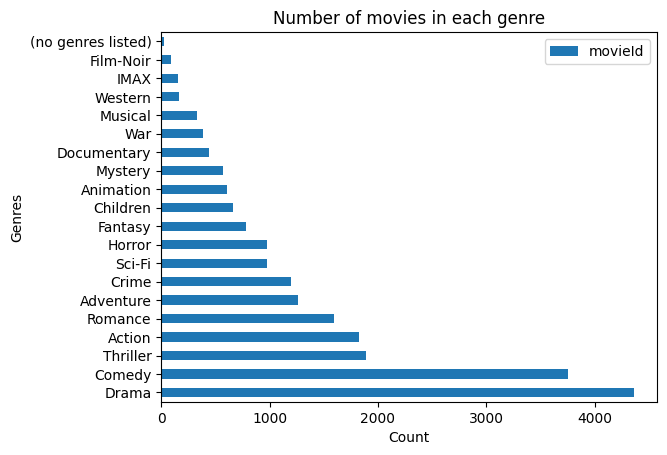

In [243]:
# plot the the number of movies in each genre
genres_counts.plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Number of movies in each genre')

### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  


In [244]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [245]:
ratings.rating.value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

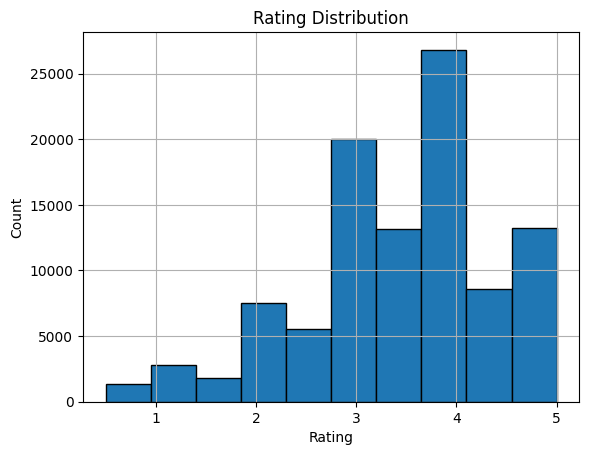

In [246]:
ratings.hist(column = 'rating', edgecolor = 'black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')

In [247]:
# ratings.rating.plot(kind = 'hist', edgecolor = 'black', xlabel='Rating', ylabel='Count', title='Rating Distribution')

### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-number ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

In [248]:
# ratio of whole-number ratings/total ratings
ratings[ratings.rating.apply(lambda x:x.is_integer())].shape[0] / ratings.shape[0]

0.6985402038954341

Obervation: 
around 70% use whole number rating, 30% half-number ratings. Also, from the graph below, we know that whole-number ratings are higher than half-number ratings. Maybe because user preference for giving ratings in whole numbers.


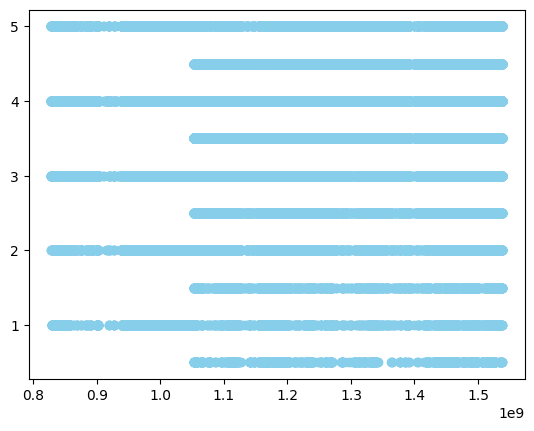

In [249]:
plt.scatter(ratings.timestamp, ratings.rating, color = 'skyblue')

### Q4:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

UTC: 1996.03.27 23:59:59

timestamp:  827971199

UTC: 2018.09.24 23:59:59

timestamp: 1537833599

In [250]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [251]:
# ratings were created by 610 users
ratings.userId.nunique()

610

In [252]:
# making sure all timestamps are within the range of 1996.03.28-2018.09.24
ratings.timestamp.between(827971199, 1537833599).value_counts()

timestamp
True    100836
Name: count, dtype: int64

### Q5:
Create a visualization showing the number of ratings produced on each day of the week.  

Hint: the `pd.to_datetime()` function might be useful here, as well as the `dt` accessor.

Make sure your axis labels are in a reasonable order.

In [253]:
from datetime import datetime
# convert the timestamp to datetime
q = pd.to_datetime(ratings.timestamp, unit = 's').apply(lambda x: x.weekday())
day_of_week = pd.DataFrame(q.value_counts().sort_index()) # 0 is Monday, 6 is Sunday
day_of_week.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week

,count
Monday,17583
Tuesday,16411
Wednesday,14014
Thursday,10706
Friday,14455
Saturday,11458
Sunday,16209


Text(0.5, 1.0, 'Ratings by Day of Week')

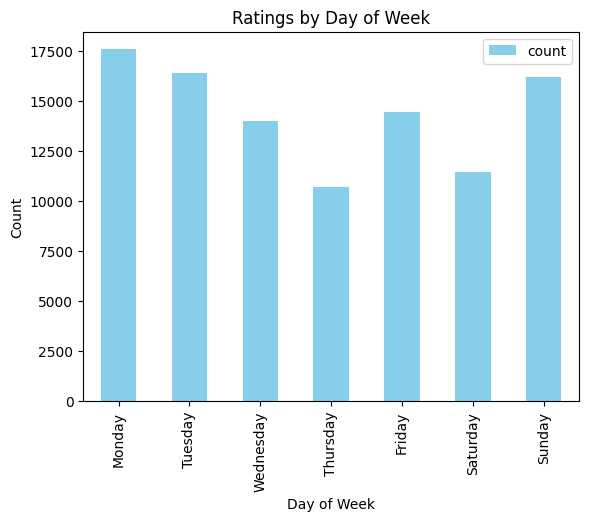

In [254]:
day_of_week.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Ratings by Day of Week')

### Q6a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of **characters** in the tag.

**Hint:** the `str.len()` function might be useful here.

In [255]:
tags['taglen'] = tags.tag.str.len()
tags.head()

,userId,movieId,tag,timestamp,taglen
0,2,60756,funny,1445714994,5
1,2,60756,Highly quotable,1445714996,15
2,2,60756,will ferrell,1445714992,12
3,2,89774,Boxing story,1445715207,12
4,2,89774,MMA,1445715200,3


### Q6b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

<Axes: title={'center': 'Tag Length Distribution'}, xlabel='Tag Length', ylabel='Count'>

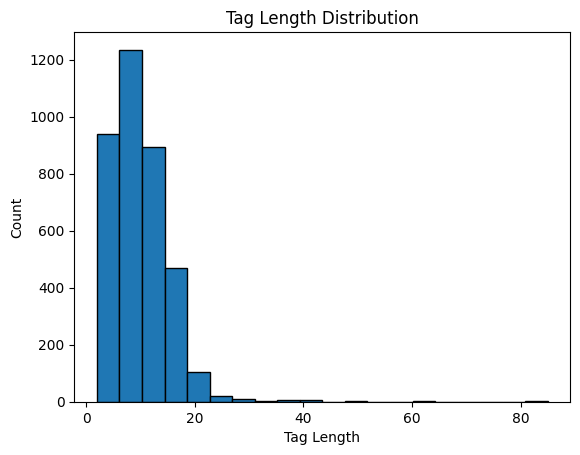

In [256]:
# plot the distribution of tag length
tags.taglen.plot(kind = 'hist', bins = 20, edgecolor = 'black', xlabel='Tag Length', ylabel='Count', title='Tag Length Distribution')

### Q7:
Create a visualization that shows the average rating for each genre.


In [257]:
movie_rating = movie_gd.merge(ratings, on = 'movieId', how = 'inner')
movie_rating.head()

,movieId,title,genres,year,decade,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1995,1990s,1,4.0,964982703
1,1,Toy Story (1995),Adventure,1995,1990s,5,4.0,847434962
2,1,Toy Story (1995),Adventure,1995,1990s,7,4.5,1106635946
3,1,Toy Story (1995),Adventure,1995,1990s,15,2.5,1510577970
4,1,Toy Story (1995),Adventure,1995,1990s,17,4.5,1305696483


In [258]:
avg_rating_genre = movie_rating.pivot_table(index = 'genres', 
                         values = 'rating', 
                         aggfunc = 'mean').sort_values(by = 'rating', ascending = False)
avg_rating_genre

,rating
genres,
Film-Noir,3.920115
War,3.808294
Documentary,3.797785
Crime,3.658294
Drama,3.656168
Mystery,3.632460
Animation,3.629937
IMAX,3.618335
Western,3.583938


(3.0, 4.0)

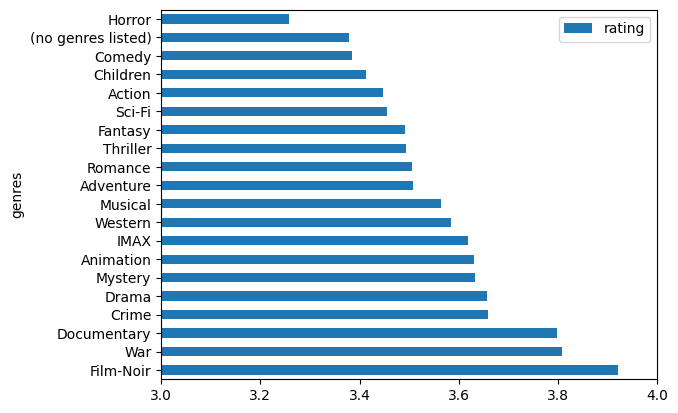

In [259]:
# plot the average rating of each genre, limit the x-axis to 3-4
avg_rating_genre.plot(kind = 'barh')
plt.xlim(3, 4)

### Q8:
Create a visualization that shows the distribution of the **number** of ratings of "good" movies (i.e., those with a mean rating of 3.5 or highter) and "bad" movies (i.e., those with a mean rating of less than 3.5), broken down by the decade when the movie was released.

Note that you are not being asked to create a visualization that shows the distribution of the ratings themselves, but rather the distribution of the **number** of ratings for each of the two groups of movies.

**Hint:** You will need to join the `movies` and `ratings` DataFrames to get the decade information.

**Hint:** You may want to create a box plot or a violin plot (or both).

In [260]:
a = ratings.merge(movies, on = 'movieId', how = 'inner')
a


,userId,movieId,rating,timestamp,title,genres,year,decade
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s
...,...,...,...,...,...,...,...,...
100813,610,160341,2.5,1479545749,Bloodmoon (1997),"[Action, Thriller]",1997,1990s
100814,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),"[Action, Crime, Drama]",1971,1970s
100815,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]",2005,2000s
100816,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",2016,2010s


In [261]:
a['Quality'] = np.where(a['rating'] > 3.5, 'Good', 'Bad')
a.head()

,userId,movieId,rating,timestamp,title,genres,year,decade,Quality
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s,Good
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s,Good
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s,Good
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s,Bad
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1990s,Good


/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_23375/1940179151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a.groupby(['decade', 'Quality']).size().unstack().plot(kind = 'bar', stacked = True)


Text(0.5, 1.0, 'Good and Bad Movies by Decade')

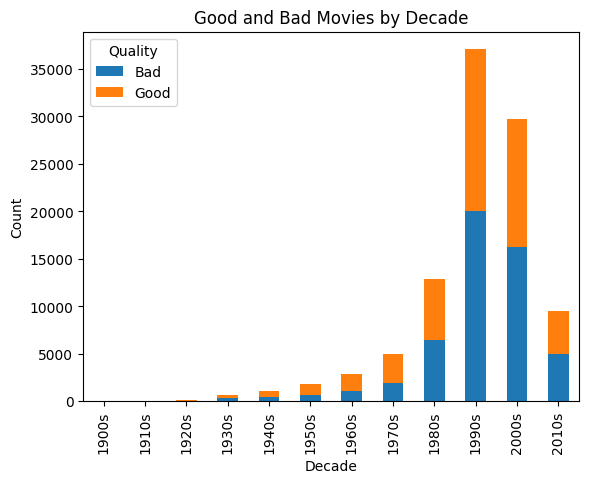

In [262]:
# plot the number of good and bad movies by decade
a.groupby(['decade', 'Quality']).size().unstack().plot(kind = 'bar', stacked = True)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Good and Bad Movies by Decade')


/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_23375/964713562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a.groupby(['decade', 'Quality']).size().unstack().plot(kind = 'box', stacked = True)


Text(0.5, 1.0, 'Good and Bad Movies by Decade')

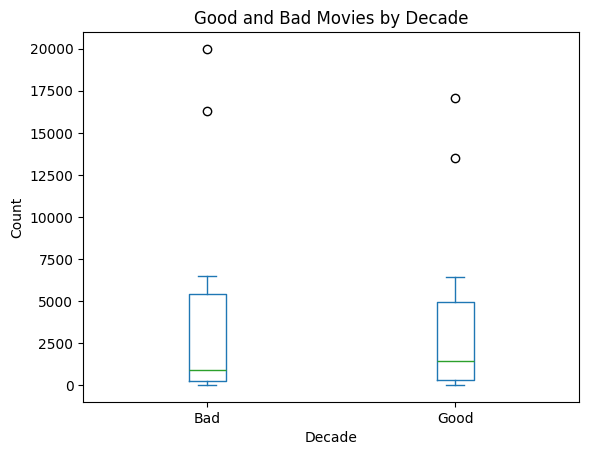

In [263]:
# boxplot of good and bad movies by decade
a.groupby(['decade', 'Quality']).size().unstack().plot(kind = 'box', stacked = True)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Good and Bad Movies by Decade')


## END OF NOTEBOOK